In [1]:
import pandas as pd

In [231]:
Washington_Wizards = pd.read_html('https://en.wikipedia.org/wiki/List_of_Washington_Wizards_seasons')

In [232]:
Washington_Wizards_Seasons = Washington_Wizards[2]

In [233]:
Washington_Wizards_Record = Washington_Wizards[3]

In [234]:
Charlotte_Hornets = pd.read_html('https://en.wikipedia.org/wiki/List_of_Charlotte_Hornets_seasons')

In [235]:
Charlotte_Hornets_Seasons = Charlotte_Hornets [2]

In [236]:
Charlotte_Hornets_Record = Charlotte_Hornets[3]

In [237]:
Orlando_Magic = pd.read_html('https://en.wikipedia.org/wiki/List_of_Orlando_Magic_seasons')

In [238]:
Orlando_Magic_Seasons = Orlando_Magic[2]

In [239]:
Orlando_Magic_Record = Orlando_Magic[3]

In [246]:
def season_preprocess(team):
    Seasons_Head = team.loc[0,:]
    Seasons_Head_New = ['Season','Conference_Finish', 'Division_Finish', 'Wins', 'Losses', 'Win%']
    team = team.drop(index = [0], axis = 0)
    team.set_axis(labels = Seasons_Head, axis = 1)
    team = team.dropna(how = 'any', subset= ['Team','Finish'])
    team = team.loc[:, ['Season', 'Finish', 'Wins', 'Losses', 'Win%']]
    team.set_axis(labels = Seasons_Head_New, axis = 1)
    team['Conference_Finish'] = team.Conference_Finish.str.extract(r'([0-9]*)')
    team['Division_Finish'] = team.Division_Finish.str.extract(r'([0-9]*)')
    team['Win%'] = '0' + team['Win%']
    team['Conference_Finish'] = team['Conference_Finish'].astype(int)
    team['Division_Finish'] = team['Division_Finish'].astype(int)
    team['Wins'] = team['Wins'].astype(int)
    team['Losses'] = team['Losses'].astype(int)
    team['Win%'] = team['Win%'].astype(float)
    team['Season'] = team.Season.str.extract(r'(^[0-9]*)')
    team['Season'] = team['Season'].astype(int)
    team['Win%'] = team['Win%']*100
    return team

In [247]:
Washington_Wizards_Seasons = season_preprocess(Washington_Wizards_Seasons)

C:\Users\xueke\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  """
C:\Users\xueke\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  


In [248]:
Charlotte_Hornets_Seasons = season_preprocess(Charlotte_Hornets_Seasons)

C:\Users\xueke\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  """
C:\Users\xueke\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  


In [249]:
Orlando_Magic_Seasons = season_preprocess(Orlando_Magic_Seasons)

C:\Users\xueke\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  """
C:\Users\xueke\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  


In [250]:
import matplotlib.pyplot as plt

In [295]:
def team_plot(team,teamname):
    plt.figure(100*100)
    fig,ax1 = plt.subplots()

    ax1.plot(team.Season, team.Conference_Finish,'r.-')
    ax1.plot(team.Season, team.Division_Finish,'r.--')
    ax1.set_ylim(25,0)
    ax1.set_xlabel('Season /year')
    ax1.set_ylabel('Finish ranking /th')
    plt.legend()

    ax2 = ax1.twinx()
    ax2.plot(team.Season, team.Wins,'b.-')
    ax2.plot(team.Season, team['Win%'],'g.-')
    ax2.set_ylim(15,80)
    ax2.set_ylabel('Winnings & Win%')
    plt.legend()
    plt.title(teamname+'_Analysis')
    plt.savefig(f'{teamname}.png', dpi = 300)

<Figure size 432x288 with 0 Axes>

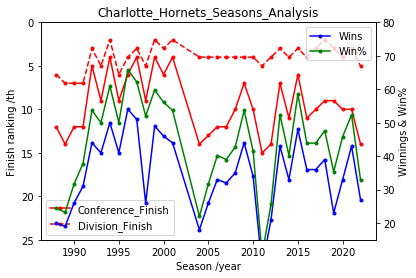

In [296]:
team_plot(Charlotte_Hornets_Seasons,'Charlotte_Hornets_Seasons')

<Figure size 432x288 with 0 Axes>

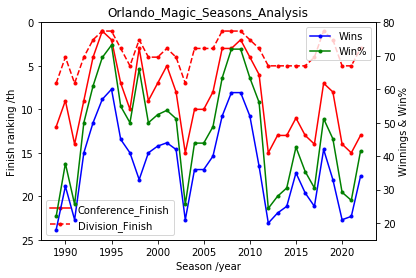

In [297]:
team_plot(Orlando_Magic_Seasons,'Orlando_Magic_Seasons')

<Figure size 432x288 with 0 Axes>

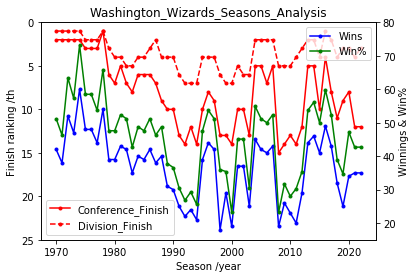

In [298]:
team_plot(Washington_Wizards_Seasons,'Washington_Wizards_Seasons')